In [1]:
import astropy
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors

In [2]:
#APOKASC file & file variables
hdul = fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.7.2.fits")
hdu = hdul[1]
A_data = hdu.data
#print(np.size(A_data))
KIC_A = hdu.data['KEPLER_INT'] 
Logg_A = hdu.data['DR16_LOGG_COR']
Teff_A = hdu.data['DR16_TEFF_COR']
FeH_A = hdu.data['DR16_M_H_COR']
R_APO3 = hdu.data['APOKASC3P_RADIUS']

In [3]:
#APOLLINAIRE file & file variables (b = background)
hdul_b = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
hdu_b = hdul_b[0]
B_data = hdu_b.data
KIC_B = np.array(B_data[:,0,0])
nu_max = np.array(B_data[:,0,2])

In [4]:
#Intersection between Apollinaire and APOKASC
common_KIC, A_indices, B_indices = np.intersect1d(KIC_A, KIC_B, return_indices=True)

good_indices = np.where((Teff_A[A_indices] > 0) & (R_APO3[A_indices] > 0))
bad_indices = np.where(np.logical_or(Teff_A[A_indices] <= 0, R_APO3[A_indices] <= 0))

B_indices = B_indices[good_indices]
A_indices = A_indices[good_indices]

A_data = A_data[A_indices]
B_data = np.array(B_data[B_indices,:,:])

KIC_B = np.array(B_data[:,0,0])
nu_max = np.array(B_data[:,0,2])

In [5]:
#Raw data Variables
ln10 = np.log(10)
Teff = A_data['DR16_TEFF_COR']
logTeff = np.log10(Teff)
elogTeff = A_data['DR16_TEFF_COR_ERR']/Teff/ln10
logg = A_data['DR16_LOGG_COR']
elogg = A_data['DR16_LOGG_COR_ERR']

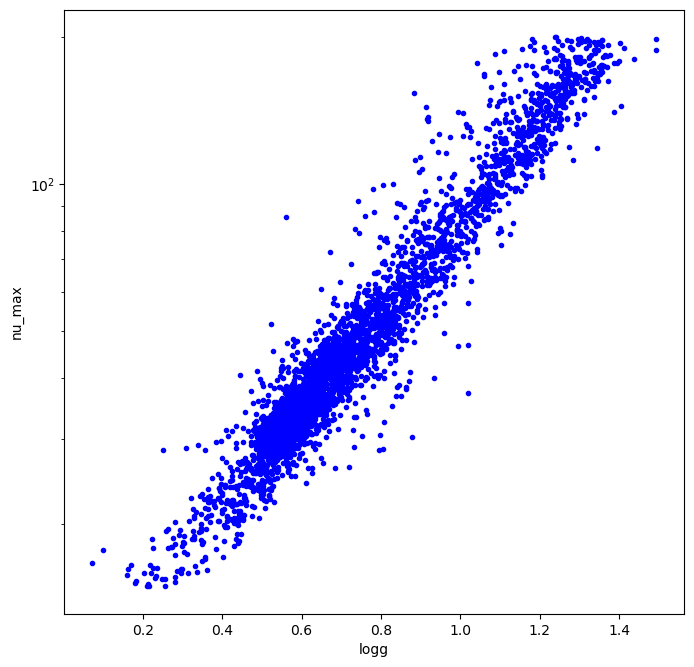

In [15]:
figure(figsize=(8,8), dpi=100)
#plt.plot(logg-0.5*logTeff, nu_max, 'b.')
plt.yscale('log')
#ax = plt.axes()
#ax.set_yticklabels(['20','30','40','50','60','70','80'])
ax.set_yticks([20,30,40,50,60,70,80,100,200])
plt.plot(logg-0.5*logTeff, nu_max, 'b.')
plt.xlabel('logg')
plt.ylabel('nu_max')
plt.show()